In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/creditcardfraud/creditcard.csv


In [5]:
import warnings
warnings.filterwarnings('ignore')
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score
np.random.seed(2)

In [10]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Scale Data

In [11]:
scaler = StandardScaler()
data['NormalizedAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))

### Split the data

In [12]:
data = data.drop(['Amount','Time'],axis=1)
y= data['Class']
X = data.drop(['Class'],axis=1)

In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### Convert Data

In [16]:
train_identity = X_train.index
test_identity = X_test.index 

In [17]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep Neural Network
### Create the model

In [18]:
model = Sequential()
# add an input layer
model.add(Dense(input_dim=29,units=16,activation='relu'))
#add 2nd hidden layer
model.add(Dense(units=24,activation='relu'))
#add dropout layer
model.add(Dropout(0.5))
#add 3rd hidden layer
model.add(Dense(units=20,activation='relu'))
#add 4th hidden layer
model.add(Dense(units=24,activation='relu'))
#add output layer
model.add(Dense(units=1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

### Fit model

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 [==============================] - 16s 1ms/step - loss: 0.0074 - accuracy: 0.9989
Epoch 2/5
13291/13291 [==============================] - 16s 1ms/step - loss: 0.0041 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 16s 1ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 16s 1ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 16s 1ms/step - loss: 0.0035 - accuracy: 0.9994


### Model test

In [21]:
score = model.evaluate(X_test,y_test)
print(score)

2671/2671 [==============================] - 2s 801us/step - loss: 0.0036 - accuracy: 0.9994
[0.0035695466212928295, 0.9993680119514465]


In [22]:
y_pred = model.predict(X_test)

In [26]:
def plot_confusion_matrix(cm,classes,normalize=False,title='ConfusionMatrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. If required, normalization can be applied
    by setting normalize=True
    """
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=0)
    plt.yticks(tick_marks,classes)
    
    fmt= '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment='center',
                color='white' if cm[i,j]>thresh else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [27]:
cm = confusion_matrix(y_test,y_pred.round())
print(cm)

[[85274    22]
 [   32   115]]


Confusion matrix, without normalization


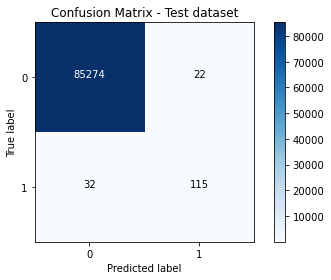

In [28]:
plot_confusion_matrix(cm,classes=[0,1],title='Confusion Matrix - Test dataset')

In [29]:
print("Accuracy_score:",accuracy_score(y_test,y_pred.round()))
print("Precision_score:",precision_score(y_test,y_pred.round()))
print("Recall_score:",recall_score(y_test,y_pred.round()))
print("F1_score:",f1_score(y_test,y_pred.round()))

Accuracy_score: 0.9993679997191109
Precision_score: 0.8394160583941606
Recall_score: 0.782312925170068
F1_score: 0.8098591549295774
